In [1]:
#pip install spacy

In [2]:
#pip install WordCloud

In [3]:
#pip install corpus_toolkit

In [4]:
#pip install corpus_tools

In [ ]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [ ]:
#pip install spacy

In [69]:
# #import modules
# import pandas as pd
# import os
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# import numpy as np
# import matplotlib.pyplot as plt
# import spacy
# from nltk.tokenize import RegexpTokenizer
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import CountVectorizer
# from wordcloud import WordCloud
# from corpus_toolkit import corpus_tools as ct
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

In [35]:
#Read in Text files from folder
file_names = os.listdir(r'\inaugural')
file_name_and_text = {}
for file in file_names:
    with open(r'\inaugural\\' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
InAd_DF = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

In [36]:
InAd_DF

,file_name,text
0,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica..."
5,1809-Madison.txt,Unwilling to depart from examples of the most ...
6,1813-Madison.txt,About to add the solemnity of an oath to the o...
7,1817-Monroe.txt,I should be destitute of feeling if I was not ...
8,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri..."
9,1825-Adams.txt,In compliance with an usage coeval with the ex...


In [37]:
InAd_DF.drop(InAd_DF.tail(1).index,inplace=True)

In [38]:
#Split out the doc names to meaningful data values
InAd_DF[['year','president']] = InAd_DF.file_name.str.split("-",expand=True)
InAd_DF[['president','filetype']] = InAd_DF.president.str.split(".",expand=True)

In [39]:
#Look at meta data
#word count (tokens)
InAd_DF['count'] = InAd_DF['text'].str.count(' ') + 1

In [40]:
#Unique word count (types)
uniq_text = InAd_DF['text'].str.lower().str.split()
InAd_DF['Types'] = uniq_text.apply(set).apply(len)

In [41]:
#Tokeniztion (also removes punctuation and makes everything lowercase)
tokenizer = RegexpTokenizer(r'\w+')
InAd_DF['text'] = InAd_DF['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [70]:
# InAd_DF

In [43]:
#Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['government', 'can', 'let']
stopwords.extend(newStopWords)

In [44]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords]
    return words

In [45]:
InAd_DF['text'] = InAd_DF['text'].apply(lambda x : remove_stopwords(x))

In [71]:
# InAd_DF

In [47]:
#lemmatization
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [48]:
InAd_DF['text'] = InAd_DF['text'].apply(lambda x: word_lemmatizer(x))


InAd_DF['text'].head()

0    fellow citizen senate house representative amo...
1    fellow citizen called upon voice country execu...
2    first perceived early time middle course ameri...
3    friend fellow citizen called upon undertake du...
4    proceeding fellow citizen qualification consti...
Name: text, dtype: object

In [49]:
#Create DTM (row is the file and column is the types (words), cell shows how many times word appears)
cv = CountVectorizer(ngram_range = (1,1))
dtm = cv.fit_transform(InAd_DF['text'])

In [50]:
InAd_DF

,file_name,text,year,president,filetype,count,Types
0,1789-Washington.txt,fellow citizen senate house representative amo...,1789,Washington,txt,1426,633
1,1793-Washington.txt,fellow citizen called upon voice country execu...,1793,Washington,txt,135,90
2,1797-Adams.txt,first perceived early time middle course ameri...,1797,Adams,txt,2306,893
3,1801-Jefferson.txt,friend fellow citizen called upon undertake du...,1801,Jefferson,txt,1725,750
4,1805-Jefferson.txt,proceeding fellow citizen qualification consti...,1805,Jefferson,txt,2153,870
5,1809-Madison.txt,unwilling depart example revered authority ava...,1809,Madison,txt,1171,551
6,1813-Madison.txt,add solemnity oath obligation imposed second c...,1813,Madison,txt,1200,548
7,1817-Monroe.txt,destitute feeling deeply affected strong proof...,1817,Monroe,txt,3353,1123
8,1821-Monroe.txt,fellow citizen shall attempt describe grateful...,1821,Monroe,txt,4444,1393
9,1825-Adams.txt,compliance usage coeval existence federal cons...,1825,Adams,txt,2912,1065


In [51]:
words = np.array(cv.get_feature_names())
print(pd.DataFrame.from_records(dtm[:5,:5].A, columns=words[:5]))
dtm_df = pd.DataFrame.from_records(dtm.A, columns=words)

   000  100  120  125  13
0    0    0    0    0   0
1    0    0    0    0   0
2    0    0    0    0   0
3    0    0    0    0   0
4    0    0    0    0   0


In [52]:
dtm_df

,000,100,120,125,13,14th,15th,16,1774,1776,...,yorktown,young,younger,youngest,youth,youthful,zeal,zealous,zealously,zone
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
8,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
#Look at top 50 most frequent words
freqs=dtm.sum(axis=0).A.flatten() 
index=np.argsort(freqs)[-50:] 
print(list(zip(words[index], freqs[index]))) 

WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index]))) 
WordFreq.columns = ['Word', 'Freq']

[('work', 123), ('never', 125), ('congress', 129), ('liberty', 130), ('purpose', 133), ('justice', 134), ('well', 137), ('without', 138), ('spirit', 140), ('men', 144), ('good', 147), ('make', 148), ('fellow', 148), ('principle', 151), ('made', 151), ('hope', 152), ('national', 154), ('year', 165), ('life', 179), ('free', 179), ('freedom', 183), ('union', 188), ('interest', 189), ('america', 194), ('war', 197), ('united', 197), ('duty', 208), ('constitution', 209), ('would', 209), ('american', 213), ('public', 225), ('new', 240), ('right', 249), ('one', 252), ('peace', 252), ('time', 256), ('law', 264), ('every', 285), ('citizen', 291), ('shall', 314), ('world', 331), ('power', 331), ('great', 331), ('may', 334), ('country', 336), ('must', 346), ('upon', 369), ('state', 438), ('nation', 496), ('people', 602)]


<AxesSubplot:ylabel='Word'>

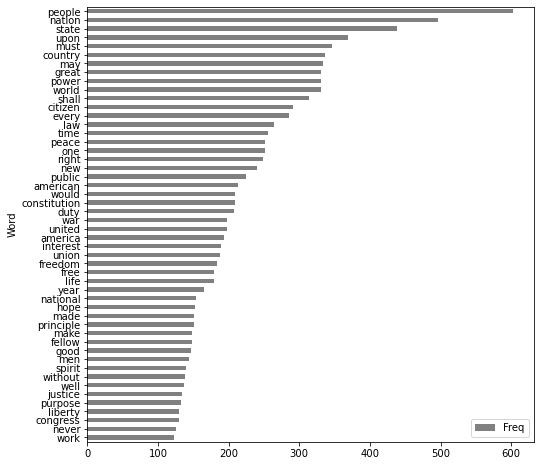

In [54]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
WordFreq.sort_values(by='Freq').plot.barh(x='Word',
                      y='Freq',
                      ax=ax,
                      color="gray")


In [68]:
# InAd_DF

<AxesSubplot:xlabel='year'>

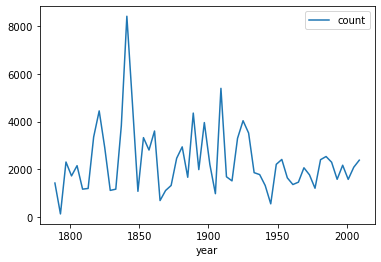

In [56]:
#Look at the meta data (Word count over time)
InAd_DF["year"] = InAd_DF["year"].astype(str).astype(int)
InAd_DF.plot.line(x='year', y='count')


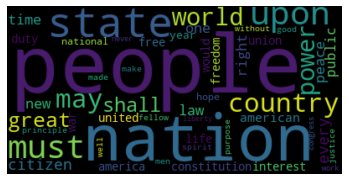

In [58]:
#Create Wordcloud
# Generate a word cloud image
data = dict(zip(WordFreq['Word'].tolist(), WordFreq['Freq'].tolist()))
wordcloud = WordCloud().generate_from_frequencies(data)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [59]:
#Comparison of 2 corpus for word frequencies (keyness)
#First, generate frequency lists for each corpus
Washfreq = ct.frequency(ct.tokenize(ct.ldcorpus(r"\Washington")))
Obamafreq = ct.frequency(ct.tokenize(ct.ldcorpus(r"\Obama")))

In [60]:
#then calculate Keyness
Obama_corp_key = ct.keyness(Obamafreq, Washfreq, effect = "odds-ratio")
Wash_corp_key = ct.keyness(Washfreq, Obamafreq, effect = "odds-ratio")
ct.head(Obama_corp_key, hits = 10) 
ct.head(Wash_corp_key, hits = 10) 

In [61]:
#Supervised Learning
InAd_DF['PreWar'] = np.where(InAd_DF['year'] < 1945, 1, 0)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dtm, InAd_DF['PreWar'], test_size=0.3, random_state=123)

In [63]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [64]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
pd.crosstab(y_test, predicted)

MultinomialNB Accuracy: 0.9411764705882353


col_0,0,1
PreWar,,
0,4,1
1,0,12


In [65]:
#Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [66]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [67]:
#Set parameters       
number_topics = 5
number_words = 8
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(dtm)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, cv, number_words)

Topics found via LDA:

Topic #0:
upon state people great law must congress shall

Topic #1:
america responsibility world peace new home respect nation

Topic #2:
new nation american world america time citizen century

Topic #3:
nation people world must great peace freedom time

Topic #4:
people state upon may constitution power shall law
